In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 7]

In [14]:
# Import data and drop some bad cases
proposed_generators = pd.read_csv('../Tax Equity Code/Clean Data/proposed_gen_master_list.csv')


/Users/rachelanderson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,8,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# select some columns to make df viewable
good_cols = ['year', 'state',
             'utility_id', 'utility_name',
             'plant_name', 'plant_code', 'plant_county', 'generator_id', 
             'ownership', 'sector_name', 'sector_val',
             'previously_canceled', 
             'scheduled_start_month', 'scheduled_start_year',
             'curr_scheduled_month', 'curr_scheduled_year', 
             'prime_mover','energy_source',
             'nameplate_cap', 'winter_cap_eia']

In [4]:
# These generators only have estimated winter cap by the EIA, or no nameplate cap at all so i will drop them for now
proposed_generators = proposed_generators[~proposed_generators['nameplate_cap'].isna()]

In [5]:
proposed_generators['nameplate_cap'] = proposed_generators['nameplate_cap'].str.replace(',','')
proposed_generators['nameplate_cap'] = pd.to_numeric(proposed_generators['nameplate_cap'])

In [6]:
temp_df = proposed_generators.groupby(['prime_mover','year']).nameplate_cap.sum().unstack(level=0)
temp_df[temp_df.isna()] = 0

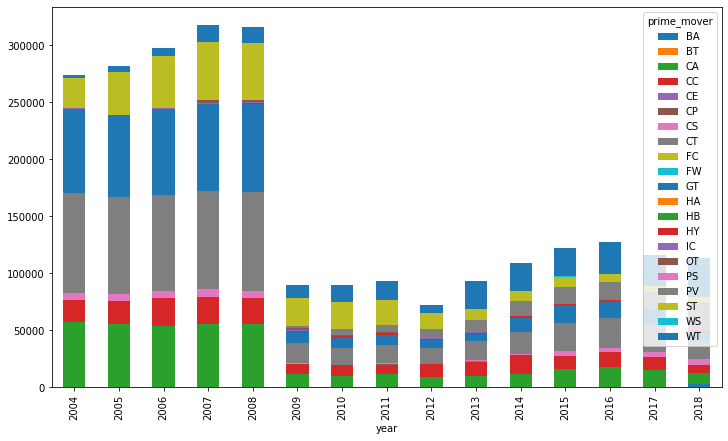

In [222]:
temp_df.plot(kind='bar', stacked=True)

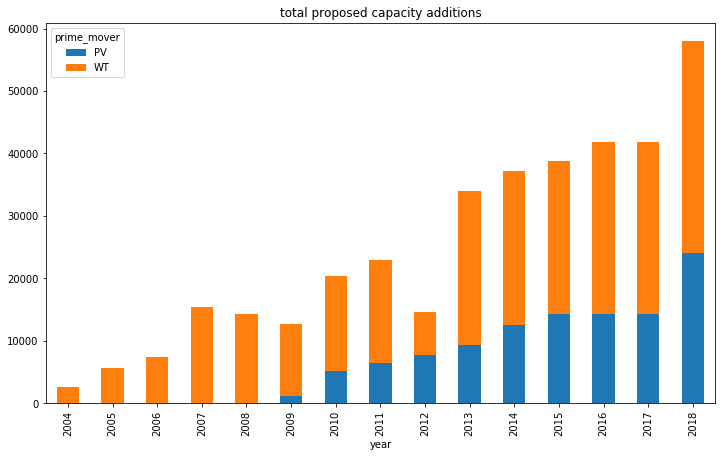

In [151]:
techList = ['PV','WT']
temp = proposed_generators[proposed_generators['prime_mover'].isin(techList)].groupby(['prime_mover','year']).nameplate_cap.sum().unstack(level=0)
temp.plot(kind='bar', stacked=True, title='total proposed capacity additions')

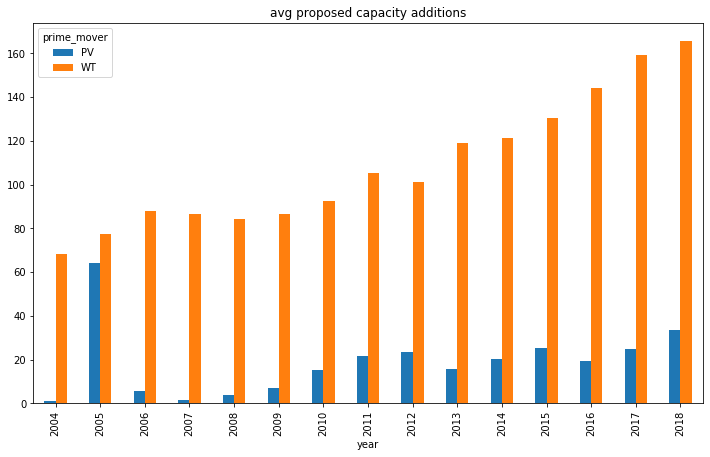

In [155]:
techList = ['PV','WT']
proposed_generators[proposed_generators['prime_mover'].isin(techList)].groupby(['prime_mover','year']).nameplate_cap.mean().unstack(level=0).plot(kind='bar',title="avg proposed capacity additions")

/Users/rachelanderson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rachelanderson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


early
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: log_cap, dtype: object

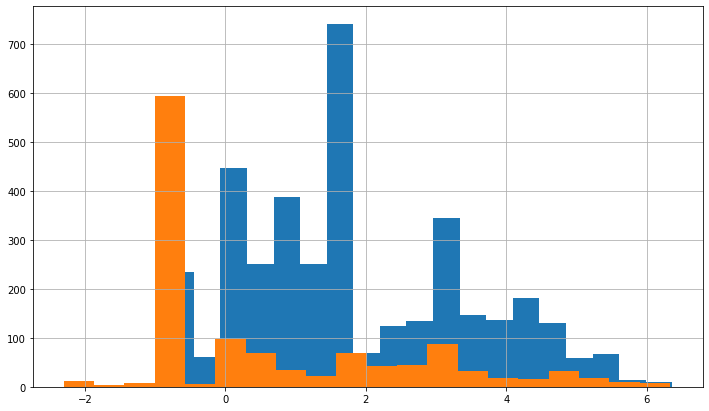

In [221]:
pv_only = proposed_generators[proposed_generators['prime_mover']=='PV']
pv_only['early']  = 0 + 1*(pv_only['year'] <= 2012)
pv_only['log_cap'] = np.log(pv_only['nameplate_cap'])

pv_only.groupby(['early']).log_cap.hist(bins=20)

year
2004    AxesSubplot(0.125,0.125;0.775x0.755)
2005    AxesSubplot(0.125,0.125;0.775x0.755)
2006    AxesSubplot(0.125,0.125;0.775x0.755)
2007    AxesSubplot(0.125,0.125;0.775x0.755)
2008    AxesSubplot(0.125,0.125;0.775x0.755)
2009    AxesSubplot(0.125,0.125;0.775x0.755)
2010    AxesSubplot(0.125,0.125;0.775x0.755)
2011    AxesSubplot(0.125,0.125;0.775x0.755)
2012    AxesSubplot(0.125,0.125;0.775x0.755)
2013    AxesSubplot(0.125,0.125;0.775x0.755)
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
2016    AxesSubplot(0.125,0.125;0.775x0.755)
2017    AxesSubplot(0.125,0.125;0.775x0.755)
2018    AxesSubplot(0.125,0.125;0.775x0.755)
Name: status, dtype: object

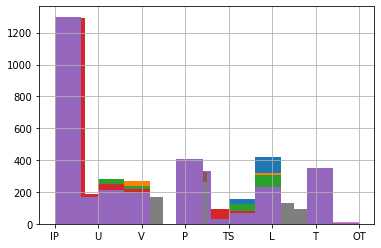

In [12]:
proposed_generators.groupby("year")['status'].hist()